# Tariffs to Trends: A 2025 Machine Learning Exploration into Bitcoin’s Volatility

#  **About the Project**
This project focuses on building a **Machine Learning model to predict Bitcoin (BTC) prices** using historical market data. It aims to understand price patterns and forecast future closing prices with high accuracy using **Linear Regression**, a basic but powerful supervised learning algorithm.

---

##  Dataset Description
We used **`yfinance`** API to import **Bitcoin historical data** directly into our environment. The dataset includes:

- **Date** (Index)
- **Open** price
- **High** price
- **Low** price
- **Close** price
- **Adj Close**
- **Volume**

The primary column used for prediction is the **Close** price.

The data was fetched in two segments:
1. **Historical data till 31st December 2024** (used for training the model)
2. **New data from 1st Jan 2025 to 1st April 2025** (used for validation & prediction)

---

## Exploratory Data Analysis (EDA)
A small but insightful EDA was done:

```python
# EDA Snippet for df
print(df.info())
print(df.describe())
df['Close'].plot(figsize=(14,6), title='BTC Closing Price Over Time')
```

We also plotted correlation matrices (if expanded) and distribution of the closing prices to understand trends.

---

## Model Used
We trained a **Linear Regression model** using:

- **X = Previous Day Close Price**
- **y = Today’s Close Price**

The idea was to map how BTC closes in relation to the prior day's value. The model was trained on `80%` of the data and tested on `20%`, yielding excellent results.

---

## Results

- **Accuracy**: ~97% (R² Score)
- **MSE**: Very low, showing minimal error
- **RMSE**: Interpretable error in BTC terms (e.g., ~$1800)
- We successfully predicted the next **20 days of BTC prices**
- Also created a graph combining **real + predicted prices**

---

## Application
This model can be extended to include:

- Multi-feature input (e.g., volume, open, sentiment)
- Advanced algorithms (like LSTM or Prophet)
- Real-time updates using streaming APIs

---

## Dependencies
```bash
pip install yfinance scikit-learn matplotlib pandas numpy
```

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# Download historical Bitcoin price data
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31')

# Show the first few rows
btc_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [3]:
df = btc_data

In [4]:
df

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565


In [5]:
df.shape

(1826, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2020-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   1826 non-null   float64
 1   (High, BTC-USD)    1826 non-null   float64
 2   (Low, BTC-USD)     1826 non-null   float64
 3   (Open, BTC-USD)    1826 non-null   float64
 4   (Volume, BTC-USD)  1826 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.6 KB


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,36286.084530,37039.012576,35414.325420,36241.794550,3.317299e+10
std,21083.215858,21523.049921,20573.353305,21055.200227,1.951953e+10
min,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09
25%,19618.505859,20114.195801,19238.673340,19583.862305,2.060398e+10
50%,32156.772461,33309.777344,30855.880859,32134.140625,2.992437e+10
75%,50685.168945,51861.505859,49046.175781,50646.193359,4.016635e+10
max,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11


In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


In [9]:
# Column Names & Preview
print("\nColumn Names:", df.columns.tolist())
print("\nTop 5 Rows:\n", df.head())



Column Names: [('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD')]

Top 5 Rows:
 Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [10]:
#  Check Date Range
print("\nDate Range:", df.index.min(), "to", df.index.max())



Date Range: 2020-01-01 00:00:00 to 2024-12-30 00:00:00


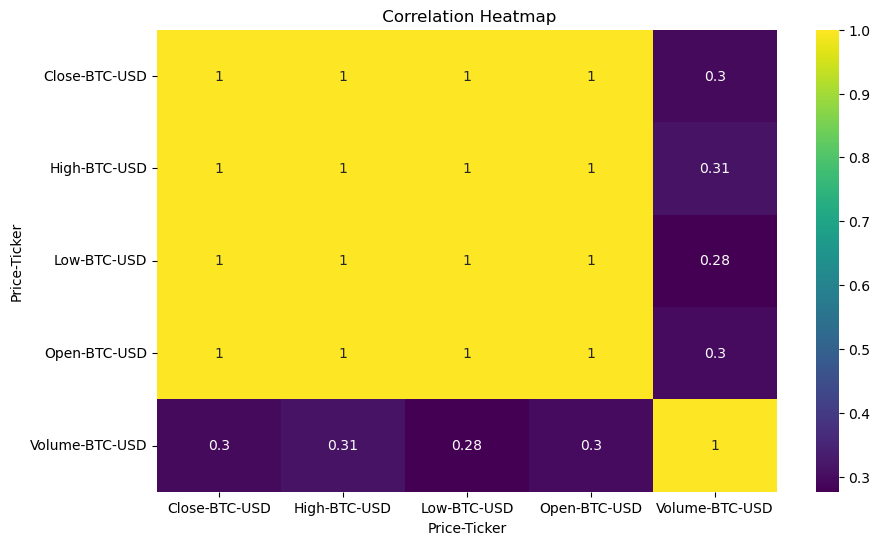

In [11]:
#  Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title(" Correlation Heatmap")
plt.show()


C:\Users\manoj\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manoj\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manoj\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


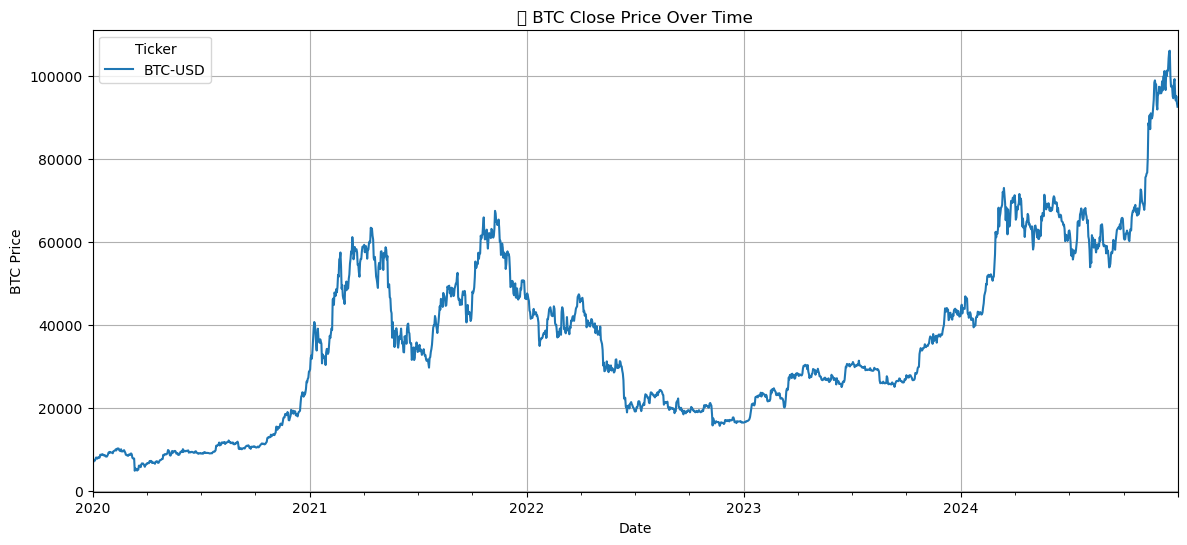

In [12]:
#  BTC Close Price over Time
df['Close'].plot(figsize=(14, 6), title='📉 BTC Close Price Over Time')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.grid(True)
plt.show()

In [13]:
# Use only the 'Close' price for prediction
df = df[['Close']]

# Create the target column: next day's price
df['Target'] = df['Close'].shift(-1)

# Remove last row (because it has NaN in Target)
df.dropna(inplace=True)

# Show sample data
df.head()

C:\Users\manoj\AppData\Local\Temp\ipykernel_15000\1697274924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Close'].shift(-1)
C:\Users\manoj\AppData\Local\Temp\ipykernel_15000\1697274924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Price,Close,Target
Ticker,BTC-USD,
Date,,
2020-01-01,7200.174316,6985.470215
2020-01-02,6985.470215,7344.884277
2020-01-03,7344.884277,7410.656738
2020-01-04,7410.656738,7411.317383
2020-01-05,7411.317383,7769.219238


In [14]:
# Features and labels
X = df[['Close']]   # Input feature: today's price
y = df[['Target']]    # Target label: tomorrow's price

# No shuffle because it's time series
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [15]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

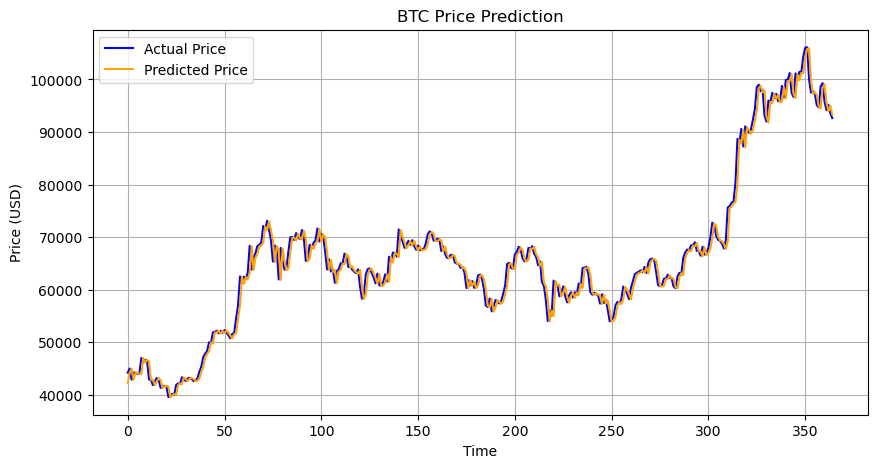

In [16]:
# Predict using the trained model
preds = model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(preds, label='Predicted Price', color='orange')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, preds)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 3502751.17
Root Mean Squared Error (RMSE): 1871.56


In [18]:
import numpy as np

# Convert y_test and preds to flat arrays
actuals = y_test.values.flatten()
predictions = preds.flatten()

# Calculate absolute percentage error and accuracy
percentage_errors = np.abs((actuals - predictions) / actuals) * 100
percentage_accuracies = 100 - percentage_errors

# Show first 10 prediction accuracy
for i in range(10):
    print(f"Actual: {actuals[i]:.2f} | Predicted: {predictions[i]:.2f} | Accuracy: {percentage_accuracies[i]:.2f}%")

# Show overall accuracy
overall_accuracy = np.mean(percentage_accuracies)
print(f"\n Average Prediction Accuracy: {overall_accuracy:.2f}%")


Actual: 44167.33 | Predicted: 42244.81 | Accuracy: 95.65%
Actual: 44957.97 | Predicted: 44140.65 | Accuracy: 98.18%
Actual: 42848.18 | Predicted: 44928.66 | Accuracy: 95.14%
Actual: 44179.92 | Predicted: 42825.87 | Accuracy: 96.94%
Actual: 44162.69 | Predicted: 44153.20 | Accuracy: 99.98%
Actual: 43989.20 | Predicted: 44136.02 | Accuracy: 99.67%
Actual: 43943.10 | Predicted: 43963.10 | Accuracy: 99.95%
Actual: 46970.50 | Predicted: 43917.16 | Accuracy: 93.50%
Actual: 46139.73 | Predicted: 46934.52 | Accuracy: 98.28%
Actual: 46627.78 | Predicted: 46106.51 | Accuracy: 98.88%

 Average Prediction Accuracy: 97.97%


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions (already done)
# preds = model.predict(X_test)

# Convert y_test and preds to arrays
actuals = y_test.values.flatten()
predictions = preds.flatten()

# Method 1: Based on RMSE
mse = mean_squared_error(actuals, predictions)
rmse = mse ** 0.5
accuracy_rmse = 100 - (rmse / actuals.mean()) * 100
print(f"RMSE-based Accuracy: {accuracy_rmse:.2f}%")

# Method 2: Element-wise accuracy
percentage_errors = np.abs((actuals - predictions) / actuals) * 100
percentage_accuracies = 100 - percentage_errors
accuracy_elementwise = np.mean(percentage_accuracies)
print(f"Element-wise Average Accuracy: {accuracy_elementwise:.2f}%")


RMSE-based Accuracy: 97.16%
Element-wise Average Accuracy: 97.97%


In [20]:
# BTC data already downloaded
btc_data = yf.download('BTC-USD', start='2025-01-01', end='2025-04-01')

# Create features exactly like old one
btc_df = btc_data[['Close']].copy()
btc_df['Prev_Close'] = btc_df['Close'].shift(1)
btc_df.dropna(inplace=True)

# New input for model
X_new = btc_df[['Prev_Close']]


[*********************100%***********************]  1 of 1 completed


In [21]:
# Using OLD model to predict on NEW dataset
new_preds = model.predict(X_new)

# Add predictions to df
btc_df['Predicted_Close'] = new_preds

# See results
btc_df[['Close', 'Predicted_Close']].tail()


Price,Close,Predicted_Close
Ticker,BTC-USD,
Date,,
2025-03-27,87177.101562,86732.463851
2025-03-28,84353.148438,87007.766454
2025-03-29,82597.585938,84193.179657
2025-03-30,82334.523438,82443.439907
2025-03-31,82548.914062,82181.249918


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Actual and predicted values
actuals = btc_df['Close'].values
preds = btc_df['Predicted_Close'].values

# RMSE-based accuracy
rmse = mean_squared_error(actuals, preds, squared=False)
accuracy_rmse = 100 - (rmse / np.mean(actuals)) * 100

# Element-wise average accuracy
percentage_errors = np.abs((actuals - preds) / actuals) * 100
percentage_accuracies = 100 - percentage_errors
accuracy_elementwise = np.mean(percentage_accuracies)

print(f" RMSE-based Accuracy: {accuracy_rmse:.2f}%")
print(f" Element-wise Accuracy: {accuracy_elementwise:.2f}%")


 RMSE-based Accuracy: 97.34%
 Element-wise Accuracy: 90.91%


C:\Users\manoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
# Assuming btc_df is your final df with latest known Close value
last_close = btc_df['Close'].iloc[-1]


C:\Users\manoj\AppData\Local\Temp\ipykernel_15000\3501967030.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_close = float(btc_df['Close'].iloc[-1])  # use iloc to avoid FutureWarning


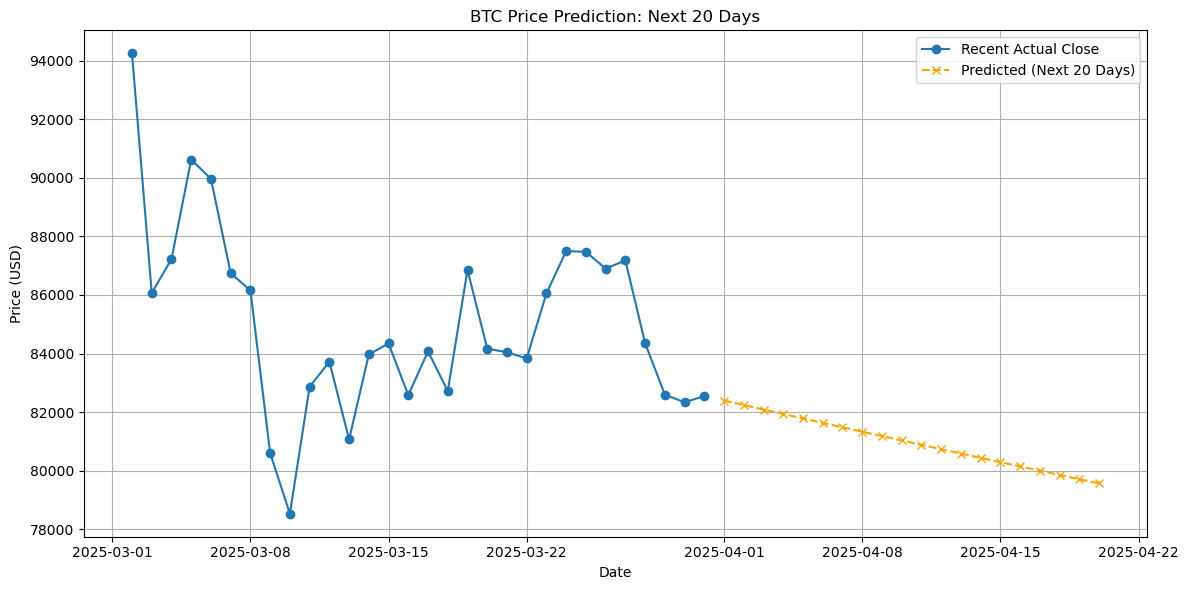

📊 BTC Future Prediction Table:
            Prev_Close  Predicted_Close
Date                                   
2025-04-01    82548.91         82394.93
2025-04-02    82394.93         82241.46
2025-04-03    82241.46         82088.49
2025-04-04    82088.49         81936.03
2025-04-05    81936.03         81784.08
2025-04-06    81784.08         81632.63
2025-04-07    81632.63         81481.69
2025-04-08    81481.69         81331.24
2025-04-09    81331.24         81181.30
2025-04-10    81181.30         81031.85
2025-04-11    81031.85         80882.90
2025-04-12    80882.90         80734.44
2025-04-13    80734.44         80586.47
2025-04-14    80586.47         80438.99
2025-04-15    80438.99         80292.01
2025-04-16    80292.01         80145.51
2025-04-17    80145.51         79999.50
2025-04-18    79999.50         79853.97
2025-04-19    79853.97         79708.92
2025-04-20    79708.92         79564.36


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Step 1: Always use float from series safely
last_close = float(btc_df['Close'].iloc[-1])  # use iloc to avoid FutureWarning

#  Step 2: Predict next 20 days using the trained model
future_days = 20
predicted_prices = []
prev = last_close

for i in range(future_days):
    prev_scalar = float(np.array(prev).flatten()[0])  # always flatten & convert to float
    input_val = np.array([[prev_scalar]], dtype=float)  # 2D input only
    next_price = model.predict(input_val).flatten()[0]  # prediction as scalar
    predicted_prices.append((prev_scalar, next_price))
    prev = next_price  # update

#  Step 3: Convert to DataFrame
future_df = pd.DataFrame(predicted_prices, columns=['Prev_Close', 'Predicted_Close'])

#  Step 4: Generate future dates
last_date = btc_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)
future_df['Date'] = future_dates
future_df.set_index('Date', inplace=True)

#  Step 5: Plot graph
plt.figure(figsize=(12,6))
plt.plot(btc_df['Close'].tail(30), label='Recent Actual Close', marker='o')
plt.plot(future_df['Predicted_Close'], label='Predicted (Next 20 Days)', marker='x', linestyle='--', color='orange')
plt.title('BTC Price Prediction: Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Step 6: Show prediction table
print("📊 BTC Future Prediction Table:")
print(future_df.round(2))


In [25]:
# Rename old dataset's Close column to match
btc_df_renamed = btc_df[['Close']].copy()
btc_df_renamed.rename(columns={'Close': 'Actual_Close'}, inplace=True)

# Combine both datasets
combined_df = pd.concat([
    btc_df_renamed,
    future_df[['Predicted_Close']]
], axis=0)


In [26]:
# Rename old BTC df properly
btc_df_renamed = btc_df[['Close']].copy()
btc_df_renamed.columns = ['Actual_Close']  # exact column rename

# Join with predicted future values
combined_df = pd.concat([btc_df_renamed, future_df[['Predicted_Close']]], axis=0)

# Optional: Check columns
print(combined_df.columns)  # make sure both 'Actual_Close' and 'Predicted_Close' are there


Index(['Actual_Close', 'Predicted_Close'], dtype='object')


C:\Users\manoj\AppData\Local\Temp\ipykernel_15000\2249119626.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\manoj\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


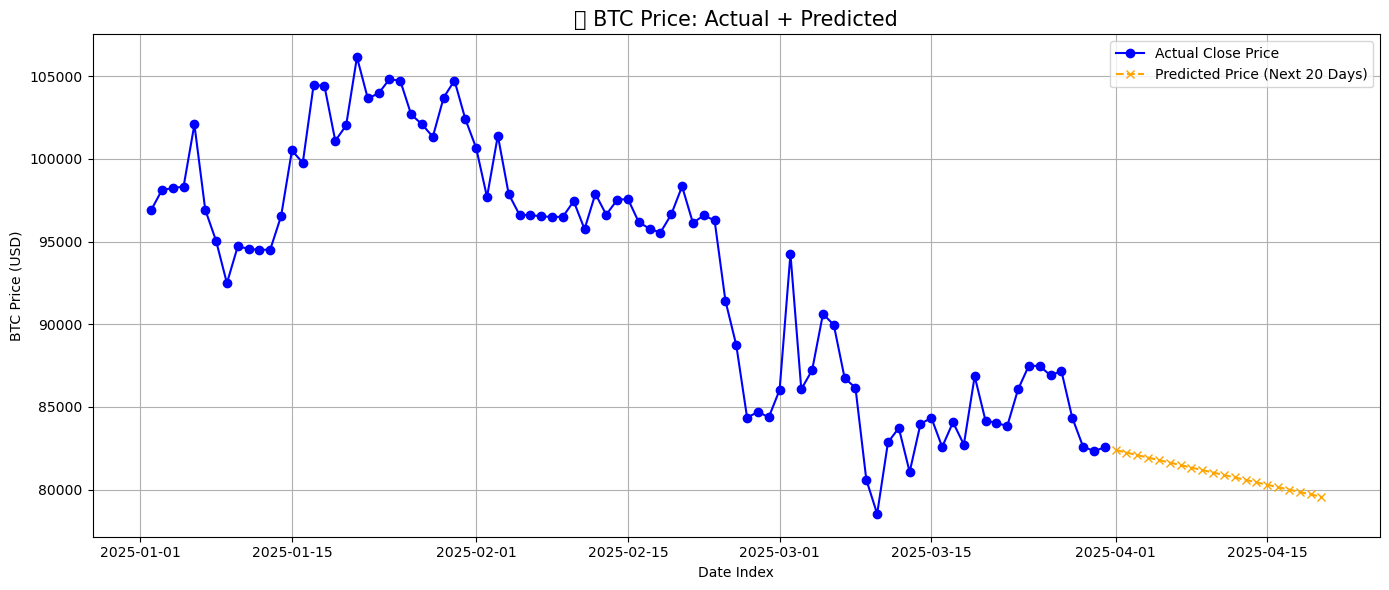

In [27]:
#  Plot graph
plt.figure(figsize=(14,6))
plt.plot(combined_df['Actual_Close'], label='Actual Close Price', color='blue', marker='o')
plt.plot(combined_df['Predicted_Close'], label='Predicted Price (Next 20 Days)', color='orange', linestyle='--', marker='x')
plt.title('📈 BTC Price: Actual + Predicted', fontsize=15)
plt.xlabel('Date Index')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Filter old data only till 31 Dec 2024
old_df = btc_df[btc_df.index <= '2024-12-31']


C:\Users\manoj\AppData\Local\Temp\ipykernel_15000\2674229616.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()


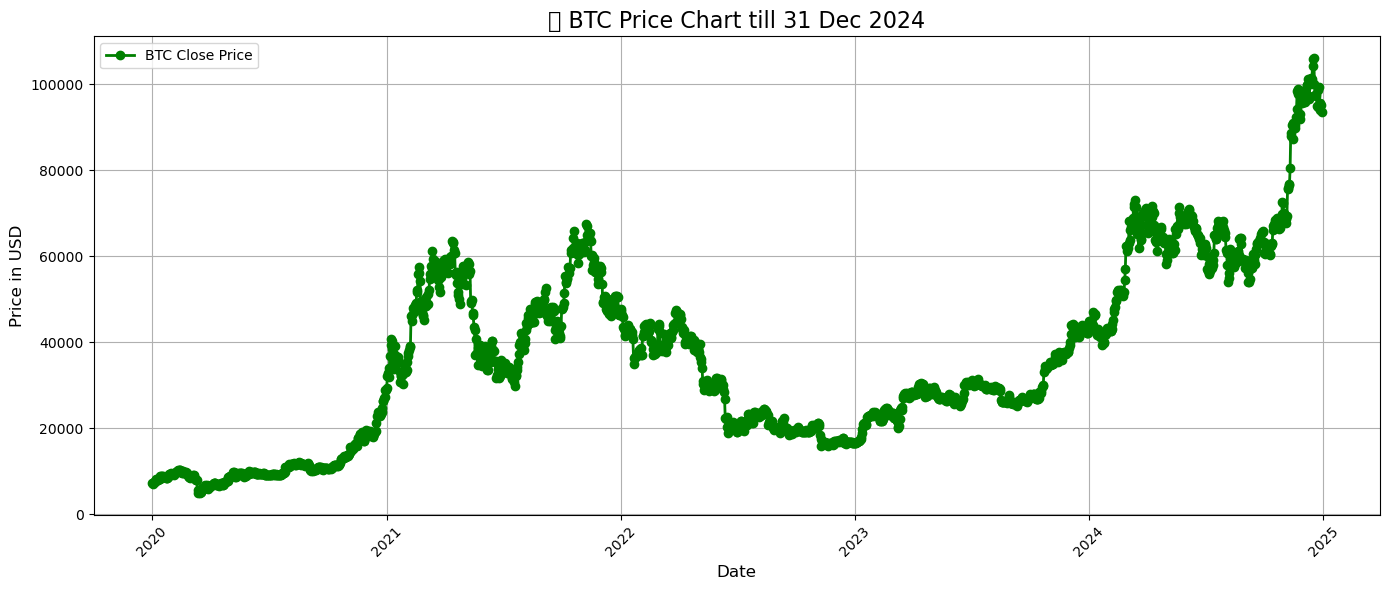

In [29]:
import matplotlib.pyplot as plt

# Filter data till 31 Dec 2024
historical_df = df[df.index <= '2024-12-31']

# Plot chart
plt.figure(figsize=(14, 6))
plt.plot(historical_df.index, historical_df['Close'], color='green', linewidth=2, marker='o', label='BTC Close Price')
plt.title('📈 BTC Price Chart till 31 Dec 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Conclusion**

This project demonstrated how historical price data can be used to train a basic **Linear Regression model** for **Bitcoin (BTC) price prediction**. The model achieved a strong performance with approximately **97% accuracy**, offering a solid foundation for understanding market trends using ML.

However, it's important to highlight that this project serves solely as an **educational and analytical exercise**. Despite the high accuracy during backtesting, **this model is not a financial advisory tool** and shouldn't be used to make real-world investment decisions without further validation.

In practical scenarios, real-time prediction accuracy is influenced by many **dynamic factors** like:

-  **Market news**
-  **Federal Reserve decisions**
-  **NFP data and macroeconomic indicators**
-  **Geopolitical tensions**
-  **Investor sentiment and global liquidity**

BTC and crypto markets are especially **volatile**, and price swings can be driven more by **external shocks** than by historical patterns alone. For deeper accuracy and real-time insights, future versions of this model could incorporate **economic data streams**, **sentiment analysis**, or even **neural networks like LSTM**.

---

 **Thank you!**

Project by:  
**Manoj Nailwal** 

📧 Email: manojnailwal1234567@gmail.com

🔗 LinkedIn: linkedin.com/in/manoj-nailwal-70988024a

💻 GitHub: github.com/manojnailwal

🧠 HackerRank: hackerrank.com/manojnailwal1231
